In [1]:
# Importing Required Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud

In [2]:
# Loading Dataset
# Assume the data set name as Netflix_titles.csv

df = pd.read_csv(r'C:\Users\theba\OneDrive\Desktop\Projects\Project 4 Netflix Data Cleaning Analysis and Visuvalization\Netflix_titles.csv.csv')

In [3]:

df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
# Data cleaning
# Checking for missing values

df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
# Dropping Duplicates if any
df.drop_duplicates(inplace=True)

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [8]:
# Dropping Rows with missing information
df.dropna(subset=['director','country'],inplace=True)

In [9]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [10]:
# Converting date_added to datetime fomat
df['date_added']=pd.to_datetime(df['date_added'])

In [11]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [12]:
# EDA analysis(Exploratory Data Analysis)
# 1- Contenet Type Distribution (Movies vs TV shows)
# count the number of movies and tv shows
type_counts =df['type'].value_counts()

In [13]:
type_counts

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

C:\Users\theba\AppData\Local\Temp\ipykernel_2444\3720780047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


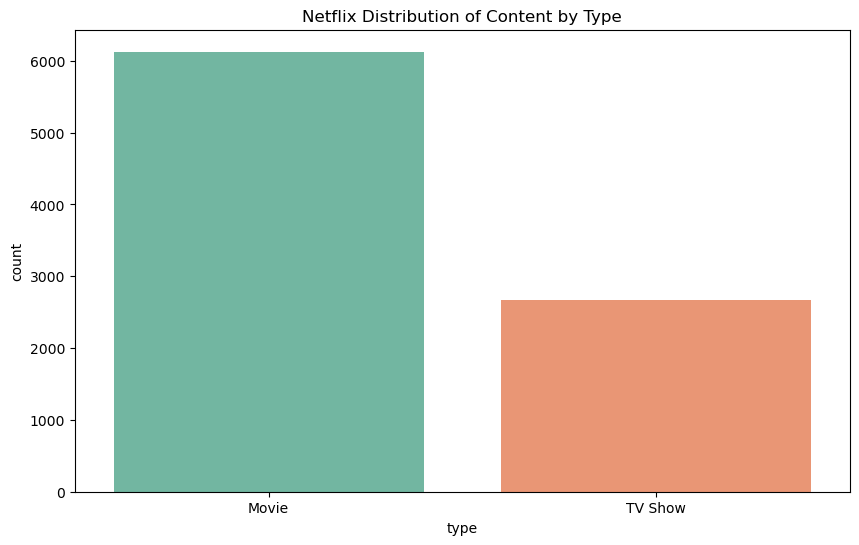

In [14]:
# Distribution plot
plt.figure(figsize=(10,6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Netflix Distribution of Content by Type')
plt.xlabel('type')
plt.ylabel('count')
plt.show()

In [15]:
# Most Commen Genres
# Split the listed_in column and count genres
df['genres']= df['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

C:\Users\theba\AppData\Local\Temp\ipykernel_2444\3711274253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


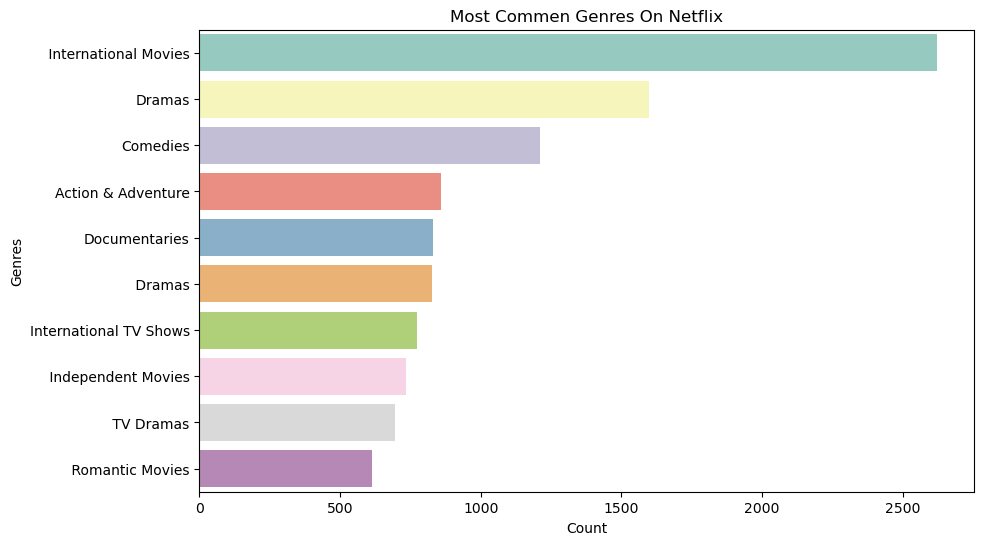

In [16]:
# Plotting the Most Commen Genres
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Commen Genres On Netflix')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()


In [17]:
# Content Added over Time
# Extracting year and month from the date_added
df['year_added'] = df['date_added'].dt.year
df['month_added']= df['date_added'].dt.month

C:\Users\theba\AppData\Local\Temp\ipykernel_2444\547840423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data= df, palette='coolwarm')


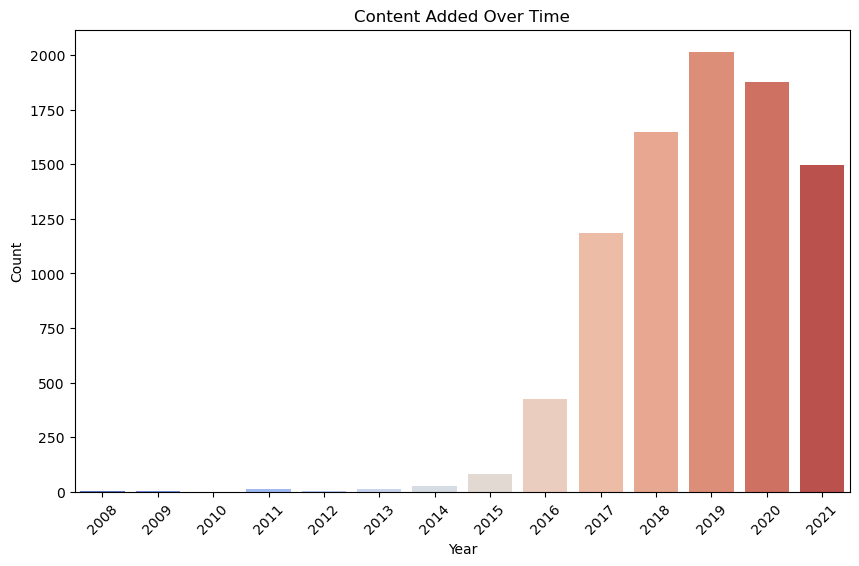

In [18]:
# Plotting count plot for Content Added Over The Years
plt.figure(figsize=(10,6))
sns.countplot(x='year_added', data= df, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [19]:
# Top Ten Directors with the most titles
# count titles by director
top_directors =df['director'].value_counts().head(10)

C:\Users\theba\AppData\Local\Temp\ipykernel_2444\3775161074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_directors.values, y= top_directors.index, palette='Blues_d')


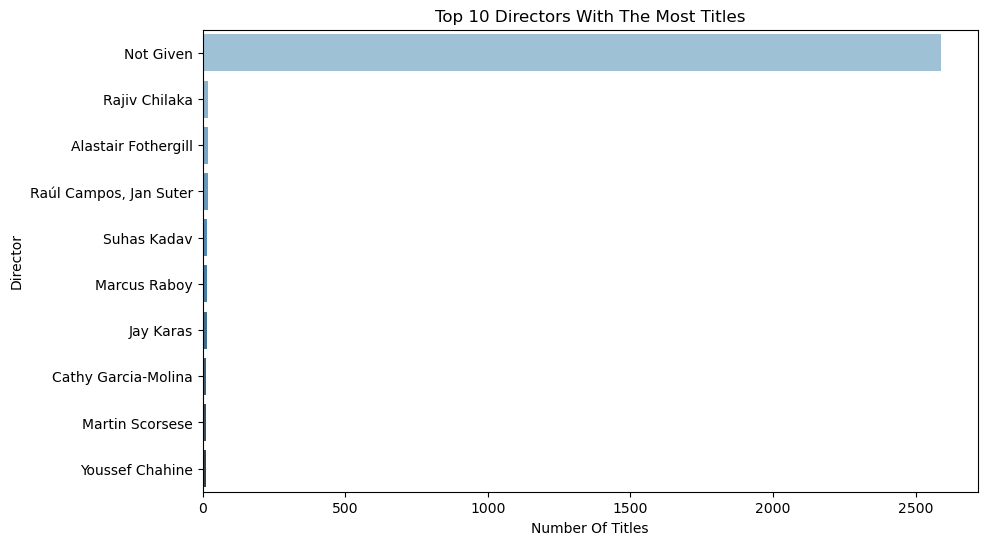

In [20]:
# Plotting bar plot for Top Directors 
plt.figure(figsize=(10, 6))
sns.barplot(x= top_directors.values, y= top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors With The Most Titles')
plt.xlabel('Number Of Titles')
plt.ylabel('Director')
plt.show()

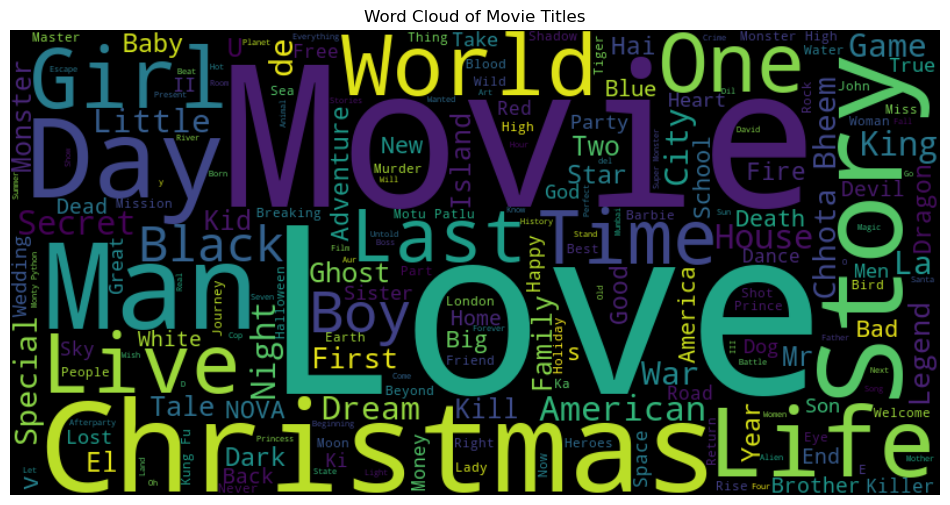

In [26]:
# 5. Word Cloud of Movie Titles
from wordcloud import WordCloud
import matplotlib.pyplot as plt

movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()